In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### <pr> load dataset <pr>
#### print 5 rows of the data frame

In [2]:
CustomersDataset = pd.read_csv("CustomersDataset.csv")
CustomersDataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#number of rows and columns
CustomersDataset.shape

(7043, 21)

# Handel the Data or Cleaning The Data
---

In [4]:
CustomersDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
CustomersDataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
CustomersDataset.drop_duplicates(inplace=True)

In [7]:
CustomersDataset['customerID'].unique().size

7043

## replacing strings by numeric values to make sense


In [8]:
CustomersDataset["Churn"]=CustomersDataset["Churn"].replace(['No','Yes'],[0,1])
CustomersDataset["TotalCharges"]=CustomersDataset["TotalCharges"].replace([' '],[0])
CustomersDataset["PaperlessBilling"]=CustomersDataset["PaperlessBilling"].replace(['No','Yes'],[0,1]) 
CustomersDataset["StreamingMovies"]=CustomersDataset["StreamingMovies"].replace(['No','Yes','No internet service'],[0,1,2])
CustomersDataset["StreamingTV"]=CustomersDataset["StreamingTV"].replace(['No','Yes','No internet service'],[0,1,2])
CustomersDataset["TechSupport"]=CustomersDataset["TechSupport"].replace(['No','Yes','No internet service'],[0,1,2])
CustomersDataset["DeviceProtection"]=CustomersDataset["DeviceProtection"].replace(['No','Yes','No internet service'],[0,1,2])
CustomersDataset["OnlineBackup"]=CustomersDataset["OnlineBackup"].replace(['No','Yes','No internet service'],[0,1,2])
CustomersDataset["OnlineSecurity"]=CustomersDataset["OnlineSecurity"].replace(['No','Yes','No internet service'],[0,1,2])
CustomersDataset["MultipleLines"]=CustomersDataset["MultipleLines"].replace(['No','Yes','No phone service'],[0,1,2])
CustomersDataset["PhoneService"]=CustomersDataset["PhoneService"].replace(['No','Yes'],[0,1])
CustomersDataset["Dependents"]=CustomersDataset["Dependents"].replace(['No','Yes'],[0,1])
CustomersDataset["Partner"]=CustomersDataset["Partner"].replace(['No','Yes'],[0,1])
CustomersDataset["gender"]=CustomersDataset["gender"].replace(['Female','Male'],[0,1])
CustomersDataset["Contract"]=CustomersDataset["Contract"].replace(['Month-to-month','One year','Two year'],[0,1,2])
CustomersDataset["InternetService"]=CustomersDataset["InternetService"].replace(['DSL','Fiber optic','No'],[0,1,2])

CustomersDataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,0,1,...,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [9]:
CustomersDataset.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.000863,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,0.000126,-0.011754,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,-0.032310,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,0.156530,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,0.000891,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,0.044590,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,-0.030359,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.387436,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,0.247398,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,-0.340949,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,0.146153,0.019423
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.340949,1.000000,0.607788,0.658287,0.662957,0.609795,0.712890,0.709020,0.099721,-0.138625,-0.323260,-0.047291
OnlineSecurity,-0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,0.607788,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,-0.621227,-0.332819
OnlineBackup,-0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,0.658287,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.262402,-0.538454,-0.291449


# Drop any features that will not affect our prediction


In [10]:
CustomersDataset.drop(['customerID','PaymentMethod'],axis=1,inplace=True)

## to avoid any OverFlow

In [11]:
CustomersDataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
scaler = MinMaxScaler()
CustomersDataset = pd.DataFrame(scaler.fit_transform(CustomersDataset), columns=CustomersDataset.columns)
CustomersDataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.003437,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.385075,0.217564,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.012453,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,1.0,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.239303,0.211951,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.017462,1.0


# Split The Data to Train & Test 

---

In [13]:
x =CustomersDataset.drop(["Churn"],axis=1)#feature
y =CustomersDataset["Churn"]#target

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

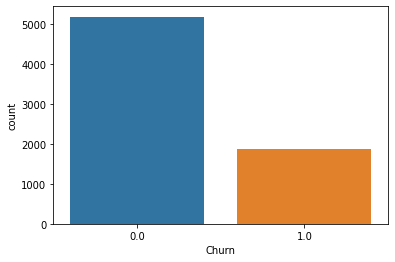

In [14]:
sns.countplot(CustomersDataset["Churn"])

We are going to use *SMOTE* tobalance class distribution by randomlyincreasing this minority class examples By Replicating them that's all so now let's use this smooth so for that we
python
```
from imblearn.over_sampling import SMOTE
x_res,y_res =SMOTE().fit_resample(x,y)
y_res.value_counts()
y_res.value_counts()
sns.countplot(y_res)
```

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=44,shuffle=True)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [16]:
print(f"Train size {x_train.shape[0]} rows\nTest size {x_test.shape[0]} rows")

Train size 4718 rows
Test size 2325 rows


In [17]:
#the shape of train and test y
print("Shape of Y train: " + str(y_train.shape))   
print("Shape of Y test: " + str(y_test.shape))

Shape of Y train: (4718,)
Shape of Y test: (2325,)


# reshaping it to become a matrix

In [18]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

print("Shape of Y train: " + str(y_train.shape))
print("Shape of Y test: " + str(y_test.shape))

Shape of Y train: (4718, 1)
Shape of Y test: (2325, 1)


# Start Predict Using Logistic Regression
---

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
LR_model =LogisticRegression(max_iter=1000,random_state=33,solver='saga',C=1.0)

In [21]:
LR_model.fit(x_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=33, solver='saga')

In [22]:
y_pred=LR_model.predict(x_test)
y_pred_prob = LR_model.predict_proba(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

# Calculateing Accuracy score , Precision score , Recall score and F1_Score
#### Score for train and test Data , confusing matrix , model classes and number of iterators are used
---

In [23]:
print("LogisticRegression_Model Train Score\Accuracy =", LR_model.score(x_train,y_train))
print("LogisticRegression_Model Test Score =", LR_model.score(x_test,y_test))
print("The confusion matrix For \"Test\" LogisticRegression_Model\n",confusion_matrix(y_test,y_pred))
print("LogisticRegression_Model Classes :: ", LR_model.classes_ )
print("LogisticRegression_Model Number of Iteratios", LR_model.n_iter_)

LogisticRegression_Model Train Score\Accuracy = 0.8047901653242899
LogisticRegression_Model Test Score = 0.8073118279569892
The confusion matrix For "Test" LogisticRegression_Model
 [[1560  161]
 [ 287  317]]
LogisticRegression_Model Classes ::  [0. 1.]
LogisticRegression_Model Number of Iteratios [30]


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1721
         1.0       0.66      0.52      0.59       604

    accuracy                           0.81      2325
   macro avg       0.75      0.72      0.73      2325
weighted avg       0.80      0.81      0.80      2325



In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#### FOR Y_TEST

In [27]:
print("The Accuracy Score For \"Test\" LogisticRegression_Model",accuracy_score(y_test,y_pred))
print("The Precision Score For \"Test\" LogisticRegression_Model",precision_score(y_test,y_pred,average='micro'))
print("The Recall Score For \"Test\" LogisticRegression_Model",recall_score(y_test,y_pred,average='micro'))
print("The F1_Score For \"Test\" LogisticRegression_Model",f1_score(y_test,y_pred,average='micro'))

The Accuracy Score For "Test" LogisticRegression_Model 0.8073118279569892
The Precision Score For "Test" LogisticRegression_Model 0.8073118279569892
The Recall Score For "Test" LogisticRegression_Model 0.8073118279569892
The F1_Score For "Test" LogisticRegression_Model 0.8073118279569892


#### FOR Y_TRAIN

In [28]:
# print("The Accuracy Score For \"Test\" LogisticRegression_Model",accuracy_score(y_train,y_pred))
# print("The Precision Score For \"Test\" LogisticRegression_Model",precision_score(y_train,y_pred,average='micro'))
# print("The Recall Score For \"Test\" LogisticRegression_Model",recall_score(y_train,y_pred,average='micro'))
# print("The F1_Score For \"Test\" LogisticRegression_Model",f1_score(y_train,y_pred,average='micro'))

In [29]:
import seaborn as sns

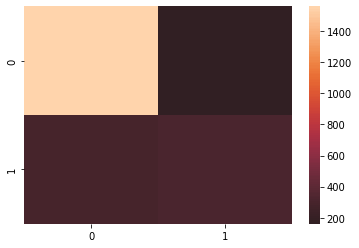

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred),center=True)
plt.show()

In [31]:
print(" the predict of  10 Rows from Our DataSets = " , y_pred[:10])
print("the peobabilty of the preidect for 10 Rows From Our DataSets is : \n",y_pred_prob[:10])

 the predict of  10 Rows from Our DataSets =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
the peobabilty of the preidect for 10 Rows From Our DataSets is : 
 [[0.92051271 0.07948729]
 [0.87015076 0.12984924]
 [0.79317361 0.20682639]
 [0.99224192 0.00775808]
 [0.96730181 0.03269819]
 [0.44897609 0.55102391]
 [0.98275256 0.01724744]
 [0.58979019 0.41020981]
 [0.58472369 0.41527631]
 [0.64099653 0.35900347]]


# Start Predict Using SVM
---

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit(x_train,y_train )

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [35]:
y_pred_2 = svm.predict(x_test)

# Calculateing Accuracy score , Precision score , Recall score and F1_Score
#### Score for train and test Data , confusing matrix , model classes and number of iterators are used
---

In [36]:
print("SVM_Model Train Score\Accuracy =", svm.score(x_train,y_train))
print("SVM_Model Test Score =", svm.score(x_test,y_test))
print("The confusion matrix For \"Test\" LogisticRegression_Model\n",confusion_matrix(y_test,y_pred))
print("SVM_Model Classes :: ", svm.classes_ )
print("SVM_Model Number of Iteratios", svm.n_iter_)

SVM_Model Train Score\Accuracy = 0.8100890207715133
SVM_Model Test Score = 0.8038709677419354
The confusion matrix For "Test" LogisticRegression_Model
 [[1560  161]
 [ 287  317]]
SVM_Model Classes ::  [0. 1.]
SVM_Model Number of Iteratios [3546]


In [37]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1721
         1.0       0.67      0.47      0.56       604

    accuracy                           0.80      2325
   macro avg       0.75      0.70      0.72      2325
weighted avg       0.79      0.80      0.79      2325



#### FOR Y_TEST

In [38]:
print("The Accuracy Score For \"Test\" SVM_Model",accuracy_score(y_test,y_pred_2))
print("The Precision Score For \"Test\" SVM_Model",precision_score(y_test,y_pred_2,average='micro'))
print("The Recall Score For \"Test\" SVM_Model",recall_score(y_test,y_pred_2,average='micro'))
print("The F1_Score For \"Test\" SVM_Model",f1_score(y_test,y_pred_2,average='micro'))


The Accuracy Score For "Test" SVM_Model 0.8038709677419354
The Precision Score For "Test" SVM_Model 0.8038709677419354
The Recall Score For "Test" SVM_Model 0.8038709677419354
The F1_Score For "Test" SVM_Model 0.8038709677419353


#### FOR Y_Train

In [39]:
# print("The Accuracy Score For \"Test\" LogisticRegression_Model",accuracy_score(y_train,y_pred_2))
# print("The Precision Score For \"Test\" LogisticRegression_Model",precision_score(y_train,y_pred_2,average='micro'))
# print("The Recall Score For \"Test\" LogisticRegression_Model",recall_score(y_train,y_pred_2,average='micro'))
# print("The F1_Score For \"Test\" LogisticRegression_Model",f1_score(y_train,y_pred_2,average='micro'))


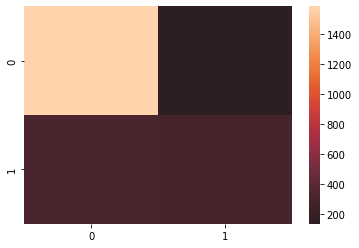

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred_2),center=True)
plt.show()

In [41]:
print(" the predict of  10 Rows from Our DataSets = " , y_pred[:10])
print("the peobabilty of the preidect for 10 Rows From Our DataSets is :\n",y_pred_prob[:10])

 the predict of  10 Rows from Our DataSets =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
the peobabilty of the preidect for 10 Rows From Our DataSets is :
 [[0.92051271 0.07948729]
 [0.87015076 0.12984924]
 [0.79317361 0.20682639]
 [0.99224192 0.00775808]
 [0.96730181 0.03269819]
 [0.44897609 0.55102391]
 [0.98275256 0.01724744]
 [0.58979019 0.41020981]
 [0.58472369 0.41527631]
 [0.64099653 0.35900347]]


# Start Predict Using Decision Tree Classifier
---

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt=DecisionTreeClassifier()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_3 =dt.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred_3)

0.7208602150537634

# Calculateing Accuracy score , Precision score , Recall score and F1_Score
#### Score for train and test Data , confusing matrix , model classes and number of iterators are used
---

In [47]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1721
         1.0       0.46      0.47      0.47       604

    accuracy                           0.72      2325
   macro avg       0.64      0.64      0.64      2325
weighted avg       0.72      0.72      0.72      2325



In [48]:
print("DecisionTreeClassifier_Model Train Score\Accuracy =", dt.score(x_train,y_train))
print("DecisionTreeClassifier_Model Test Score =", dt.score(x_test,y_test))
print("The confusion matrix For \"Test\" LogisticRegression_Model\n",confusion_matrix(y_test,y_pred_3))
print("DecisionTreeClassifier_Model Classes :: ", dt.classes_ )

DecisionTreeClassifier_Model Train Score\Accuracy = 0.9972445951674438
DecisionTreeClassifier_Model Test Score = 0.7208602150537634
The confusion matrix For "Test" LogisticRegression_Model
 [[1560  161]
 [ 287  317]]
DecisionTreeClassifier_Model Classes ::  [0. 1.]


#### FOR Y_TEST

In [49]:
print("The Accuracy Score For \"Test\"DecisionTreeClassifier_Model",accuracy_score(y_test,y_pred_3))
print("The Precision Score For \"Test\" DecisionTreeClassifier_Model",precision_score(y_test,y_pred_3,average='micro'))
print("The Recall Score For \"Test\"DecisionTreeClassifier_Model",recall_score(y_test,y_pred_3,average='micro'))
print("The F1_Score For \"Test\" DecisionTreeClassifier_Model",f1_score(y_test,y_pred_3,average='micro'))

The Accuracy Score For "Test"DecisionTreeClassifier_Model 0.7208602150537634
The Precision Score For "Test" DecisionTreeClassifier_Model 0.7208602150537634
The Recall Score For "Test"DecisionTreeClassifier_Model 0.7208602150537634
The F1_Score For "Test" DecisionTreeClassifier_Model 0.7208602150537633


#### FOR Y_TRAIN

In [50]:
# print("The Accuracy Score For \"Test\" LogisticRegression_Model",accuracy_score(y_train,y_pred_3))
# print("The Precision Score For \"Test\" LogisticRegression_Model",precision_score(y_train,y_pred_3,average='micro'))
# print("The Recall Score For \"Test\" LogisticRegression_Model",recall_score(y_train,y_pred_3,average='micro'))
# print("The F1_Score For \"Test\" LogisticRegression_Model",f1_score(y_train,y_pred_3,average='micro'))

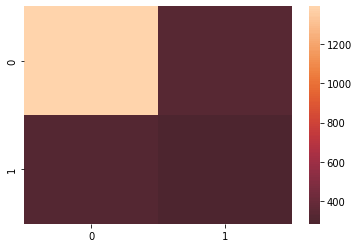

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred_3),center=True)
plt.show()

# Finally Collecting the Data in DataFrame
---

In [52]:
import seaborn as sns

In [53]:
final_data_Accuracy=pd.DataFrame({'Models':['LR','SVM','DT'],
                            'Accuracy':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_2),accuracy_score(y_test,y_pred_3)]})
final_data_Accuracy

,Models,Accuracy
0,LR,0.807312
1,SVM,0.803871
2,DT,0.720860


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


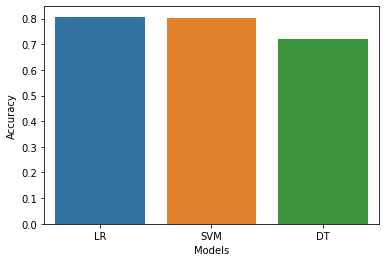

In [54]:
sns.barplot(final_data_Accuracy['Models'],final_data_Accuracy['Accuracy'])
plt.show()

In [55]:
final_data_Precision=pd.DataFrame({'Models':['LR','SVM','ID3'],
                            'PRECISION':[precision_score(y_test,y_pred),precision_score(y_test,y_pred_2),precision_score(y_test,y_pred_3)]})
final_data_Precision

,Models,PRECISION
0,LR,0.663180
1,SVM,0.674528
2,ID3,0.463533


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


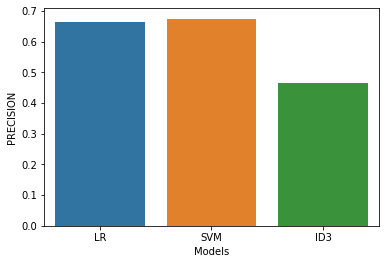

In [56]:
sns.barplot(final_data_Precision['Models'],final_data_Precision['PRECISION'])
plt.show()

In [57]:
final_data_Recall=pd.DataFrame({'Models':['LR','SVM','ID3'],
                            'Recall':[recall_score(y_test,y_pred),recall_score(y_test,y_pred_2),recall_score(y_test,y_pred_3)]})
final_data_Recall

,Models,Recall
0,LR,0.524834
1,SVM,0.473510
2,ID3,0.473510


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


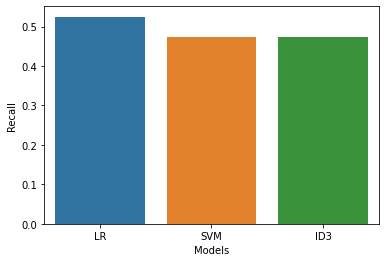

In [58]:
sns.barplot(final_data_Recall['Models'],final_data_Recall['Recall'])
plt.show()

In [59]:
final_data_F1_Score=pd.DataFrame({'Models':['LR','SVM','ID3'],
                            'F1_Score':[f1_score(y_test,y_pred),f1_score(y_test,y_pred_2),f1_score(y_test,y_pred_3)]})
final_data_F1_Score

,Models,F1_Score
0,LR,0.585952
1,SVM,0.556420
2,ID3,0.468468


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


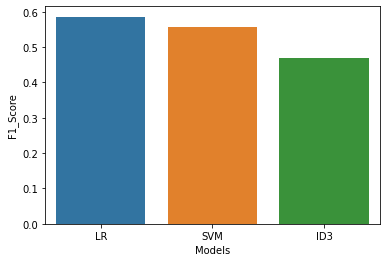

In [60]:
sns.barplot(final_data_F1_Score['Models'],final_data_F1_Score['F1_Score'])
plt.show()

# Save Our Model
--- 

In [61]:
import joblib

In [62]:
lr_model =joblib.dump(LR_model,'Churn Predict Model')
svm_model =joblib.dump(svm,'Churn Predict Model')
dt_model =joblib.dump(dt,'Churn Predict Model')

In [63]:
lr_model=joblib.load('Churn Predict Model')
svm_model=joblib.load('Churn Predict Model')
dt_model=joblib.load('Churn Predict Model')

In [64]:
CustomersDataset.columns 

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
CustomersDataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.003437,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.385075,0.217564,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.012453,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,1.0,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.239303,0.211951,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.017462,1.0


# Predict Using Our Model
---

In [66]:
print('Predict Using Logistic Regression',lr_model.predict([[0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85]]))
print('Predict Using SVM',svm_model.predict([[0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85]]))
print('Predict Using Decision Tree Classifier',dt_model.predict([[0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85]]))


Predict Using Logistic Regression [0.]
Predict Using SVM [0.]
Predict Using Decision Tree Classifier [0.]


# *Let User input* Data and Using this Data to Predict
---

In [67]:
# print("Please enter the required data for prediction", lr_model.predict([[float(input('gender')), float(input('SeniorCitizen')), float(input('Partner')), float(input('Dependents')), float(input('tenure')),float(input('PhoneService')), float(input('MultipleLines')), float(input('InternetService')), float(input('OnlineSecurity')), float(input('OnlineBackup')), float(input('DeviceProtection')), float(input('TechSupport')), float(input('StreamingTV')),float(input('StreamingMovies')), float(input('Contract')), float(input('PaperlessBilling')), float(input('MonthlyCharges')),float(input('TotalCharges'))]]))
# print("Please enter the required data for prediction", svm_model.predict([[float(input('gender')), float(input('SeniorCitizen')), float(input('Partner')), float(input('Dependents')), float(input('tenure')),float(input('PhoneService')), float(input('MultipleLines')), float(input('InternetService')), float(input('OnlineSecurity')), float(input('OnlineBackup')), float(input('DeviceProtection')), float(input('TechSupport')), float(input('StreamingTV')),float(input('StreamingMovies')), float(input('Contract')), float(input('PaperlessBilling')), float(input('MonthlyCharges')),float(input('TotalCharges'))]]))
# print("Please enter the required data for prediction", dt_model.predict([[float(input('gender')), float(input('SeniorCitizen')), float(input('Partner')), float(input('Dependents')), float(input('tenure')),float(input('PhoneService')), float(input('MultipleLines')), float(input('InternetService')), float(input('OnlineSecurity')), float(input('OnlineBackup')), float(input('DeviceProtection')), float(input('TechSupport')), float(input('StreamingTV')),float(input('StreamingMovies')), float(input('Contract')), float(input('PaperlessBilling')), float(input('MonthlyCharges')),float(input('TotalCharges'))]]))

In [68]:
print('Predict Using Logistic Regression',lr_model.predict([[0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85]]))
print('Predict Using SVM',svm_model.predict([[0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85]]))
print('Predict Using Decision Tree Classifier',dt_model.predict([[0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85]]))

Predict Using Logistic Regression [0.]
Predict Using SVM [0.]
Predict Using Decision Tree Classifier [0.]


# GUI Using Tkinter 
---

In [69]:
from tkinter import *
from tkinter import messagebox

### Adding items that need

In [70]:
app=Tk()

# Function that used to disply the data we need 
# Data Visualization for our data
def Visualization(): 

    top = Toplevel()
    top.geometry("500x500")
    top.title("    Data Visualization  ")
    
    def dis_1 ():
        sns.countplot(CustomersDataset["Churn"])
        plt.show()

    def dis_2 ():
        sns.heatmap(confusion_matrix(y_test, y_pred), center=True)
        plt.show()

    def dis_3 ():
        sns.heatmap(confusion_matrix(y_test, y_pred_2), center=True)
        plt.show()

    def dis_4 ():
        sns.heatmap(confusion_matrix(y_test, y_pred_3), center=True)
        plt.show()


    def dis_5 ():
        sns.barplot(final_data_Accuracy['Models'], final_data_Accuracy['Accuracy'])
        plt.show()


    def dis_6 ():
        sns.barplot(final_data_Precision['Models'], final_data_Precision['PRECISION'])
        plt.show()

    def dis_7 ():
        sns.barplot(final_data_Recall['Models'], final_data_Recall['Recall'])
        plt.show()

    def dis_8 ():
        sns.barplot(final_data_F1_Score['Models'], final_data_F1_Score['F1_Score'])
        plt.show()

    Button(top,text="CustomersDataset[Churn]",padx=20,pady=10,borderwidth=2.5,command=dis_1).place(x=50,y=50)
    Button(top,text="Confusion Matrix of\n Logistic Regression",padx=20,pady=10,borderwidth=2.5,command=dis_2).place(x=250,y=50)
    Button(top,text="Confusion Matrix of\n     SVM",padx=20,pady=10,borderwidth=2.5,command=dis_3).place(x=50,y=150)
    Button(top,text="Confusion Matrix of\n Decision Tree Classifier",padx=20,pady=10,borderwidth=2.5,command=dis_4).place(x=250,y=150)
    Button(top,text="Final Data Accuracy",padx=20,pady=10,borderwidth=2.5,command=dis_5).place(x=50,y=250)
    Button(top,text="Final Data Precision",padx=20,pady=10,borderwidth=2.5,command=dis_6).place(x=250,y=250)
    Button(top,text="Final Data Recall",padx=20,pady=10,borderwidth=2.5,command=dis_7).place(x=50,y=350)
    Button(top,text="Final Data F1_Score",padx=20,pady=10,borderwidth=2.5,command=dis_8).place(x=250,y=350)

# Rest make all Input Fields are clear to input new data
def Rest():
    E_Customer_ID.delete(0,END)
    E_Gender.delete(0,END)
    E_Senior_Citizen.delete(0,END)
    E_Partner.delete(0,END)
    E_Dependents.delete(0,END)
    E_Tenure.delete(0,END)
    E_Phone_Service.delete(0,END)
    E_Multiple_Lines.delete(0,END)
    E_Internet_Service.delete(0,END)
    E_Online_Security.delete(0,END)
    E_Online_Backup.delete(0,END)
    E_Device_Protection.delete(0,END)
    E_TechSupport.delete(0,END)
    E_Streaming_TV.delete(0,END)
    E_Streaming_Movies.delete(0,END)
    E_Contract.delete(0,END)
    E_Paperless_Billing.delete(0,END)
    E_Monthly_Charges.delete(0,END)
    E_Total_Charges.delete(0,END)
    E_Payment_Method.delete(0,END)

def Display_Train():
    messagebox.showinfo("    Data are relative to Train",f"LogisticRegression_Model Train\n    Score\Accuracy = {LR_model.score(x_train,y_train)} \n\nSVM_Model Train \n    Score\Accuracy = {svm.score(x_train,y_train)} \n\nDecision_Tree_Model Train  \n   Score\Accuracy = {dt.score(x_train,y_train)}\n\n")
    # print("LogisticRegression_Model Train Score\Accuracy =", LR_model.score(x_train,y_train))
    # print("SVM_Model Train Score\Accuracy =", svm.score(x_train,y_train))
    # print("Decision_Tree_Model Train Score\Accuracy =", dt.score(x_train,y_train))

def Display_Test():
    messagebox.showinfo("    Data are relative to Test",f"Churn Predict Model Accuracy Score\n{final_data_Accuracy}\n\nChurn Predict Model Precision Score\n{final_data_Precision}\n\nChurn Predict Model Recall Score\n{final_data_Recall}\n\n Churn Predict Model F1_Score\n{final_data_F1_Score}\n\nThe confusion matrix For \"Test\" LogisticRegression_Model\n{confusion_matrix(y_test,y_pred)}\n\nThe confusion matrix For \"Test\" SVM_Model\n{confusion_matrix(y_test,y_pred_2)}\n\nThe confusion matrix For \"Test\" DecisionTreeClassifier_Model\n{confusion_matrix(y_test,y_pred_3)}\n\n")
    # print('***************************************************************************************************************************************')
    # print("Churn Predict Model Accuracy Score\n",final_data_Accuracy)
    # print("Churn Predict Model Precision Score\n",final_data_Precision)
    # print("Churn Predict Model Recall Score\n",final_data_Recall)
    # print("Churn Predict Model F1_Score\n",final_data_F1_Score)
    # print("The confusion matrix For \"Test\" LogisticRegression_Model\n",confusion_matrix(y_test,y_pred))
    # print("The confusion matrix For \"Test\" SVM_Model\n",confusion_matrix(y_test,y_pred_2))
    # print("The confusion matrix For \"Test\" DecisionTreeClassifier_Model\n",confusion_matrix(y_test,y_pred_3))
    # print('********************************************************************************************************************')


def Predict_Ndata ():
    global E_Gender_val
    global E_Senior_Citizen_val
    global E_Partner_val
    global E_Dependents_val
    global E_Tenure_val

    global E_Phone_Service_val
    global E_Multiple_Lines_val
    global E_Internet_Service_val
    global E_Online_Security_val

    global E_Online_Backup_val
    global E_Device_Protection_val
    global E_TechSupport_val
    global E_Streaming_TV_val

    global E_Streaming_Movies_val
    global E_Contract_val
    global E_Paperless_Billing_val
    global E_Monthly_Charges_val
    global E_Total_Charges_val

    E_Monthly_Charges_val =E_Monthly_Charges .get()
    E_Total_Charges_val =E_Total_Charges.get()
    E_Tenure_val = E_Tenure.get()

    # E_Partner
    if E_Partner.get()=="no" or E_Partner.get()=="No" or E_Partner.get()=="NO":
        E_Partner_val =0
    if E_Partner.get()=="yes" or E_Partner.get()=="Yes" or E_Partner.get()=="YES":
        E_Partner_val =1 #############

    # E_Dependents
    if E_Dependents.get()=="no" or E_Dependents.get()=="No" or E_Dependents.get()=="NO":
        E_Dependents_val =0
    if E_Dependents.get()=="yes" or E_Dependents.get()=="Yes" or E_Dependents.get()=="YES":
        E_Dependents_val =1 #############

    # E_Phone_Service
    if E_Phone_Service.get()=="no" or E_Phone_Service.get()=="No" or E_Phone_Service.get()=="NO":
        E_Phone_Service_val =0
    if E_Phone_Service.get()=="yes" or E_Phone_Service.get()=="Yes" or E_Phone_Service.get()=="YES":
        E_Phone_Service_val =1 #############

    # E_Paperless_Billing
    if E_Paperless_Billing.get()=="no" or E_Paperless_Billing.get()=="No" or E_Paperless_Billing.get()=="NO":
        E_Paperless_Billing_val =0
    if E_Paperless_Billing.get()=="yes" or E_Paperless_Billing.get()=="Yes" or E_Paperless_Billing.get()=="YES":
        E_Paperless_Billing_val =1 #############

    # E_Senior_Citizen
    if E_Senior_Citizen.get()=="no" or E_Senior_Citizen.get()=="No" or E_Senior_Citizen.get()=="NO":
        E_Senior_Citizen_val =0
    if E_Senior_Citizen.get()=="yes" or E_Senior_Citizen.get()=="Yes" or E_Senior_Citizen.get()=="YES":
        E_Senior_Citizen_val =1 #############


    # E_Gender
    if E_Gender.get()=="Female" or E_Gender.get()=="female" or E_Gender.get()=="FEMALE":
        E_Gender_val =0
    if E_Gender.get()=="Male" or E_Gender.get()=="male" or E_Gender.get()=="MALE":
        E_Gender_val =1 #############


    # E_Multiple_Lines
    if E_Multiple_Lines.get()=="no" or E_Multiple_Lines.get()=="No" or E_Multiple_Lines.get()=="NO":
        E_Multiple_Lines_val =0
    if E_Multiple_Lines.get()=="yes" or E_Multiple_Lines.get()=="Yes" or E_Multiple_Lines.get()=="YES":
        E_Multiple_Lines_val =1
    if E_Multiple_Lines.get()=="No phone service" or E_Multiple_Lines.get()=="no phone service" :
        E_Multiple_Lines_val =2 #############

    # E_Internet_Service
    if E_Internet_Service.get()=="DSL" or E_Internet_Service.get()=="dsl":
        E_Internet_Service_val =0
    if E_Internet_Service.get()=="Fiber obtic" or E_Internet_Service.get()=="FIBER OBTIC" or E_Internet_Service.get()=="Fiber Obtic":
        E_Internet_Service_val =1
    if E_Internet_Service.get()=="No" or E_Multiple_Lines.get()=="no" or E_Multiple_Lines.get()=="NO" :
        E_Internet_Service_val =2 #############

    # E_Online_Security
    if E_Online_Security.get()=="no" or E_Online_Security.get()=="No" or E_Online_Security.get()=="NO":
        E_Online_Security_val =0
    if E_Online_Security.get()=="yes" or E_Online_Security.get()=="Yes" or E_Online_Security.get()=="YES":
        E_Online_Security_val =1
    if E_Online_Security.get()=="No internet service" or E_Online_Security.get()=="no internet service" :
        E_Online_Security_val =2 #############

    # E_Online_Backup    
    if E_Online_Backup.get()=="no" or E_Online_Backup.get()=="No" or E_Online_Backup.get()=="NO":
        E_Online_Backup_val =0
    if E_Online_Backup.get()=="yes" or E_Online_Backup.get()=="Yes" or E_Online_Backup.get()=="YES":
        E_Online_Backup_val =1
    if E_Online_Backup.get()=="No internet service" or E_Online_Backup.get()=="no internet service" :
        E_Online_Backup_val =2 #############

    # E_Device_Protection
    if E_Device_Protection.get()=="no" or E_Device_Protection.get()=="No" or E_Device_Protection.get()=="NO":
        E_Device_Protection_val =0
    if E_Device_Protection.get()=="yes" or E_Device_Protection.get()=="Yes" or E_Device_Protection.get()=="YES":
        E_Device_Protection_val =1
    if E_Device_Protection.get()=="No internet service" or E_Device_Protection.get()=="no internet service" :
        E_Device_Protection_val =2 #############

    # E_TechSupport
    if E_TechSupport.get()=="no" or E_TechSupport.get()=="No" or E_TechSupport.get()=="NO":
        E_TechSupport_val =0
    if E_TechSupport.get()=="yes" or E_TechSupport.get()=="Yes" or E_TechSupport.get()=="YES":
        E_TechSupport_val =1
    if E_TechSupport.get()=="No internet service" or E_TechSupport.get()=="no internet service" :
        E_TechSupport_val =2 #############

    # E_Streaming_TV
    if E_Streaming_TV.get()=="no" or E_Streaming_TV.get()=="No" or E_Streaming_TV.get()=="NO":
        E_Streaming_TV_val =0
    if E_Streaming_TV.get()=="yes" or E_Streaming_TV.get()=="Yes" or E_Streaming_TV.get()=="YES":
        E_Streaming_TV_val =1
    if E_Streaming_TV.get()=="No internet service" or E_Streaming_TV.get()=="no internet service" :
        E_Streaming_TV_val =2 #############

    # E_Streaming_Movies
    if E_Streaming_Movies.get()=="no" or E_Streaming_Movies.get()=="No" or E_Streaming_Movies.get()=="NO":
        E_Streaming_Movies_val =0
    if E_Streaming_Movies.get()=="yes" or E_Streaming_Movies.get()=="Yes" or E_Streaming_Movies.get()=="YES":
        E_Streaming_Movies_val =1
    if E_Streaming_Movies.get()=="No internet service" or E_Streaming_Movies.get()=="no internet service" :
        E_Streaming_Movies_val =2 #############

    # E_Contract   
    if E_Contract.get()=="Month-to-month" or E_Contract.get()=="month-to-month" or E_Contract.get()=="month to month" or E_Contract.get()=="Month to month":
        E_Contract_val =0
    if E_Contract.get()=="One year" or E_Contract.get()=="one year":
        E_Contract_val =1
    if E_Contract.get()=="Two year" or E_Contract.get()=="two year" :
        E_Contract_val =2 #############

    else :
        messagebox.showerror("    ERORR!!!!","\n    INVALED DATA \n ")




    # print('Predict Using Logistic Regression',lr_model.predict([[E_Gender_val,E_Senior_Citizen_val,E_Partner_val,E_Dependents_val,E_Tenure_val,E_Phone_Service_val,E_Multiple_Lines_val,E_Internet_Service_val,E_Online_Security_val,E_Online_Backup_val,E_Device_Protection_val,E_TechSupport_val,E_Streaming_TV_val,E_Streaming_Movies_val,E_Contract_val,E_Paperless_Billing_val,E_Monthly_Charges_val,E_Total_Charges_val]]))
    # print('Predict Using SVM',svm_model.predict([[E_Gender_val,E_Senior_Citizen_val,E_Partner_val,E_Dependents_val,E_Tenure_val,E_Phone_Service_val,E_Multiple_Lines_val,E_Internet_Service_val,E_Online_Security_val,E_Online_Backup_val,E_Device_Protection_val,E_TechSupport_val,E_Streaming_TV_val,E_Streaming_Movies_val,E_Contract_val,E_Paperless_Billing_val,E_Monthly_Charges_val,E_Total_Charges_val]]))
    # print('Predict Using Decision Tree Classifier',dt_model.predict([[E_Gender_val,E_Senior_Citizen_val,E_Partner_val,E_Dependents_val,E_Tenure_val,E_Phone_Service_val,E_Multiple_Lines_val,E_Internet_Service_val,E_Online_Security_val,E_Online_Backup_val,E_Device_Protection_val,E_TechSupport_val,E_Streaming_TV_val,E_Streaming_Movies_val,E_Contract_val,E_Paperless_Billing_val,E_Monthly_Charges_val,E_Total_Charges_val]]))

    # Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    #    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    #    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    #    'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
    #    'TotalCharges'],
    # E_Customer_ID
    # E_Payment_Method

    # Message Box For our Prediction 
    lr_model_val = lr_model.predict([[E_Gender_val,E_Senior_Citizen_val,E_Partner_val,E_Dependents_val,E_Tenure_val,E_Phone_Service_val,E_Multiple_Lines_val,E_Internet_Service_val,E_Online_Security_val,E_Online_Backup_val,E_Device_Protection_val,E_TechSupport_val,E_Streaming_TV_val,E_Streaming_Movies_val,E_Contract_val,E_Paperless_Billing_val,E_Monthly_Charges_val,E_Total_Charges_val]])
    svm_model_val = svm_model.predict([[E_Gender_val,E_Senior_Citizen_val,E_Partner_val,E_Dependents_val,E_Tenure_val,E_Phone_Service_val,E_Multiple_Lines_val,E_Internet_Service_val,E_Online_Security_val,E_Online_Backup_val,E_Device_Protection_val,E_TechSupport_val,E_Streaming_TV_val,E_Streaming_Movies_val,E_Contract_val,E_Paperless_Billing_val,E_Monthly_Charges_val,E_Total_Charges_val]])
    dt_model_val = dt_model.predict([[E_Gender_val,E_Senior_Citizen_val,E_Partner_val,E_Dependents_val,E_Tenure_val,E_Phone_Service_val,E_Multiple_Lines_val,E_Internet_Service_val,E_Online_Security_val,E_Online_Backup_val,E_Device_Protection_val,E_TechSupport_val,E_Streaming_TV_val,E_Streaming_Movies_val,E_Contract_val,E_Paperless_Billing_val,E_Monthly_Charges_val,E_Total_Charges_val]])
    
    global Churn_Predict_LR
    global Churn_Predict_SNM
    global Churn_Predict_DT

    if lr_model_val==1 :
        Churn_Predict_LR = "Yes "
    if lr_model_val==0 :
        Churn_Predict_LR = "No "

        #######################

    if svm_model_val==1 :
        Churn_Predict_SNM = "Yes "
    if svm_model_val==0 :
        Churn_Predict_SNM = "No "

        ###########################

    if dt_model_val==1 :
        Churn_Predict_DT = "Yes "
    if dt_model_val==0 :
        Churn_Predict_DT = "No "
    
    
    
    messagebox.showinfo("  Prediction  ",f"Churn Predict Using Logistic Regression =  {Churn_Predict_LR}\nChurn Predict Using SVM =  {Churn_Predict_SNM} \nChurn Predict Using Decision Tree Classifier  =  {Churn_Predict_DT}")





app.title("Churn Predict Model")
app.geometry("1000x800")
# methodology 2 Labels
Label(app,text='              Mehodology', font=("Arial", 12)).place(x=130,y=4)
Label(app,text='               Logistic Regression   -  SVM  -   Decision Tree Classifier', font=("Arial", 12)).place(x=10,y=30)
# 2 Buttons to display all data you have for Train & Test
Train_btn=Button(app, text='Train', padx=40, pady=10,borderwidth=2.5,command=Display_Train).place(x=230,y=70)
Test_btn=Button(app, text='Test', padx=40, pady=10,borderwidth=2.5,command=Display_Test).place(x=350,y=70)
# Customer Data 20 Labels & 20 Input Fields
Label(app,text='Customer Data', font=("Arial", 10)).place(x=60,y=115)
# 20 Labels start Using Place
Label(app,text='Customer ID', font=("Arial", 10)).place(x=20,y=180)
Label(app,text='Partner', font=("Arial", 10)).place(x=20,y=240)
Label(app,text='Phone Service', font=("Arial", 10)).place(x=20,y=300)
Label(app,text='Online Security', font=("Arial", 10)).place(x=20,y=360)
Label(app,text='TechSupport', font=("Arial", 10)).place(x=20,y=420)
Label(app,text='Contract', font=("Arial", 10)).place(x=20,y=480)
Label(app,text='Monthly Charges', font=("Arial", 10)).place(x=20,y=540)

Label(app,text='Gender', font=("Arial", 10)).place(x=300,y=180)
Label(app,text='Dependents', font=("Arial", 10)).place(x=300,y=240)
Label(app,text='Multiple Lines', font=("Arial", 10)).place(x=300,y=300)
Label(app,text='Online Backup', font=("Arial", 10)).place(x=300,y=360)
Label(app,text='Streaming TV', font=("Arial", 10)).place(x=300,y=420)
Label(app,text='Paperless Billing', font=("Arial", 10)).place(x=300,y=480)
Label(app,text='Total Charges', font=("Arial", 10)).place(x=300,y=540)

Label(app,text='Senior Citizen', font=("Arial", 10)).place(x=580,y=180)
Label(app,text='Tenure', font=("Arial", 10)).place(x=580,y=240)
Label(app,text='Internet Service', font=("Arial", 10)).place(x=580,y=300)
Label(app,text='Device Protection', font=("Arial", 10)).place(x=580,y=360)
Label(app,text='Streaming Movies', font=("Arial", 10)).place(x=580,y=420)
Label(app,text='Payment Method', font=("Arial", 10)).place(x=580,y=480)


# 20 Input Fields to take data from user 
E_Customer_ID=Entry(app,width=20,borderwidth=2.5)
E_Customer_ID.place(x=135,y=180)

E_Partner=Entry(app,width=20,borderwidth=2.5)
E_Partner.place(x=135,y=240)
E_Phone_Service=Entry(app,width=20,borderwidth=2.5)
E_Phone_Service.place(x=135,y=300)
E_Online_Security=Entry(app,width=20,borderwidth=2.5)
E_Online_Security.place(x=135,y=360)
E_TechSupport=Entry(app,width=20,borderwidth=2.5)
E_TechSupport.place(x=135,y=420)
E_Contract=Entry(app,width=20,borderwidth=2.5)
E_Contract.place(x=135,y=480)
E_Monthly_Charges=Entry(app,width=20,borderwidth=2.5)
E_Monthly_Charges.place(x=135,y=540)


E_Gender=Entry(app,width=20,borderwidth=2.5)
E_Gender.place(x=415,y=180)
E_Dependents=Entry(app,width=20,borderwidth=2.5)
E_Dependents.place(x=415,y=240)
E_Multiple_Lines=Entry(app,width=20,borderwidth=2.5)
E_Multiple_Lines.place(x=415,y=300)
E_Online_Backup=Entry(app,width=20,borderwidth=2.5)
E_Online_Backup.place(x=415,y=360)
E_Streaming_TV=Entry(app,width=20,borderwidth=2.5)
E_Streaming_TV.place(x=415,y=420)
E_Paperless_Billing=Entry(app,width=20,borderwidth=2.5)
E_Paperless_Billing.place(x=415,y=480)
E_Total_Charges=Entry(app,width=20,borderwidth=2.5)
E_Total_Charges.place(x=415,y=540)


E_Senior_Citizen=Entry(app,width=20,borderwidth=2.5)
E_Senior_Citizen.place(x=695,y=180)
E_Tenure=Entry(app,width=20,borderwidth=2.5)
E_Tenure.place(x=695,y=240)
E_Internet_Service=Entry(app,width=20,borderwidth=2.5)
E_Internet_Service.place(x=695,y=300)
E_Device_Protection=Entry(app,width=20,borderwidth=2.5)
E_Device_Protection.place(x=695,y=360)
E_Streaming_Movies=Entry(app,width=20,borderwidth=2.5)
E_Streaming_Movies.place(x=695,y=420)
E_Payment_Method=Entry(app,width=20,borderwidth=2.5)
E_Payment_Method.place(x=695,y=480)

# Btn to predict using the data user enterd , Btn to clear Input Field to enter new data
Predict_btn= Button(app,text='Predict',padx=60,pady=20,borderwidth=2.5,command=Predict_Ndata).place(x=190,y=600)###########command###########
Clear_btn= Button(app,text='Rest',padx=60,pady=20,borderwidth=2.5,command=Rest).place(x=372,y=600)###########command###########
Data_Visualization= Button(app,text='Data Visualization',padx=60,pady=20,borderwidth=2.5,command=Visualization).place(x=540,y=600)###########command#################################################################










app.mainloop() 


# pyinstaller.exe --onefile FileName.py in Terminal